## numpy array

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error
import csv

In [16]:
# Зчитування набору даних у numpy array
data = np.genfromtxt("PRSA_data_2010.1.1-2014.12.31.csv", delimiter=',', skip_header=1, usecols=range(1, 13), dtype=float)
# Опис стовпців
column_names = ["No", "year", "month", "day", "hour", "pm2.5", "DEWP", "TEMP", "PRES", "cbwd", "Iws", "Is", "Ir"]
data


array([[2.0100e+03, 1.0000e+00, 1.0000e+00, ..., 1.7900e+00, 0.0000e+00,
        0.0000e+00],
       [2.0100e+03, 1.0000e+00, 1.0000e+00, ..., 4.9200e+00, 0.0000e+00,
        0.0000e+00],
       [2.0100e+03, 1.0000e+00, 1.0000e+00, ..., 6.7100e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0140e+03, 1.2000e+01, 3.1000e+01, ..., 2.4270e+02, 0.0000e+00,
        0.0000e+00],
       [2.0140e+03, 1.2000e+01, 3.1000e+01, ..., 2.4672e+02, 0.0000e+00,
        0.0000e+00],
       [2.0140e+03, 1.2000e+01, 3.1000e+01, ..., 2.4985e+02, 0.0000e+00,
        0.0000e+00]])

In [7]:
# Перевірка на наявність значень NaN
nan_values = np.isnan(data).sum(axis=0)
nan_values

array([    0,     0,     0,     0,  2067,     0,     0,     0, 43824,
           0,     0,     0])

In [8]:
# Виведення стовпців з пропущеними значеннями
print("Columns with NaN values:")
print({column_names[i]: nan_values[i] for i in range(len(nan_values)) if nan_values[i] > 0})

Columns with NaN values:
{'hour': 2067, 'PRES': 43824}


In [31]:
# Імпутація пропущених значень у стовпці "pm2.5"
pm25_col_index = column_names.index("pm2.5")
imputer = SimpleImputer(strategy='median')
data[:, pm25_col_index:pm25_col_index + 1] = imputer.fit_transform(data[:, pm25_col_index:pm25_col_index + 1])
print(data[:, pm25_col_index])

[-21. -21. -21. ... -22. -22. -21.]


In [21]:
#Функція нормалізації стовпців
def normalize_columns(data, columns):
    data_normalized = data.copy()
    for col in columns:
        min_val = np.min(data[:, col])
        max_val = np.max(data[:, col])
        data_normalized[:, col] = (data[:, col] - min_val) / (max_val - min_val)
    return data_normalized

In [35]:
# Визначення числових стовпців
numerical_columns = [column_names.index(col) - 1 for col in ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']]
# Нормалізація даних
data_normalized = normalize_columns(data, numerical_columns)


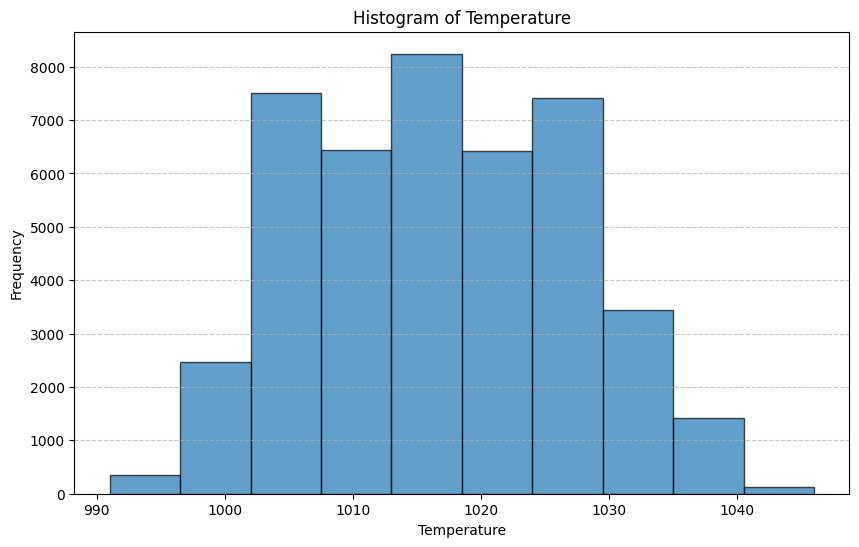

In [23]:
# Гістограма для стовпця 'TEMP'
attribute = 'TEMP'
attribute_col_index = column_names.index(attribute)

plt.figure(figsize=(10, 6))
plt.hist(data[:, attribute_col_index], bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

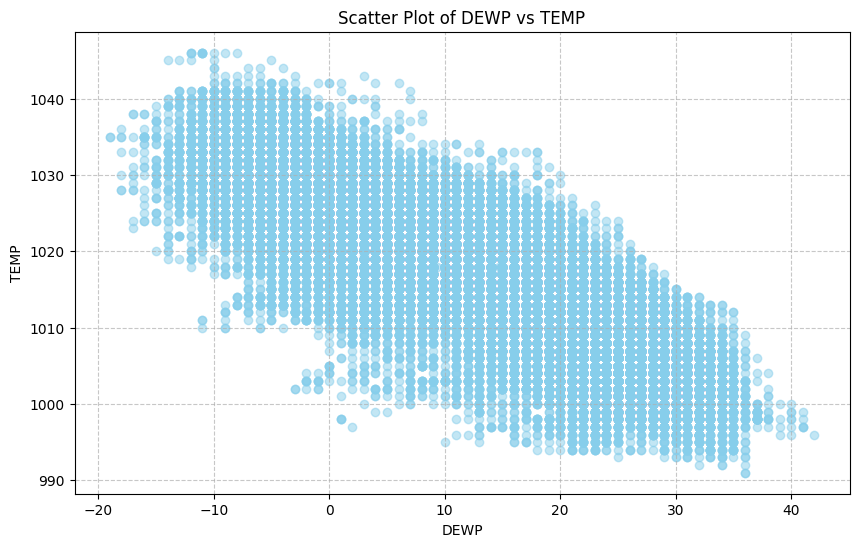

In [24]:
# Діаграма розсіювання для 'DEWP' і 'TEMP'
x_attribute = "DEWP"
y_attribute = "TEMP"
x_col_index = column_names.index(x_attribute)
y_col_index = column_names.index(y_attribute)

plt.figure(figsize=(10, 6))
plt.scatter(data[:, x_col_index], data[:, y_col_index], color='skyblue', alpha=0.5)
plt.title('Scatter Plot of DEWP vs TEMP')
plt.xlabel('DEWP')
plt.ylabel('TEMP')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [25]:
# Обчислення коефіцієнтів кореляції
pearson_corr, _ = pearsonr(data[:, x_col_index], data[:, y_col_index])
spearman_corr, _ = spearmanr(data[:, x_col_index], data[:, y_col_index])

print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Spearman correlation coefficient: {spearman_corr}")


Pearson correlation coefficient: -0.8266903532879701
Spearman correlation coefficient: -0.8325719453893624


In [26]:
# One Hot Encoding для категоріального атрибута 'cbwd'
cbwd_col_index = column_names.index('cbwd')
unique_cbwd = np.unique(data[:, cbwd_col_index])
one_hot_encoded_cbwd = np.zeros((data.shape[0], len(unique_cbwd)))

for i, val in enumerate(unique_cbwd):
    one_hot_encoded_cbwd[:, i] = (data[:, cbwd_col_index] == val).astype(float)

# Додавання One Hot Encoded даних до початкового масиву
data_one_hot_encoded = np.hstack((data, one_hot_encoded_cbwd))

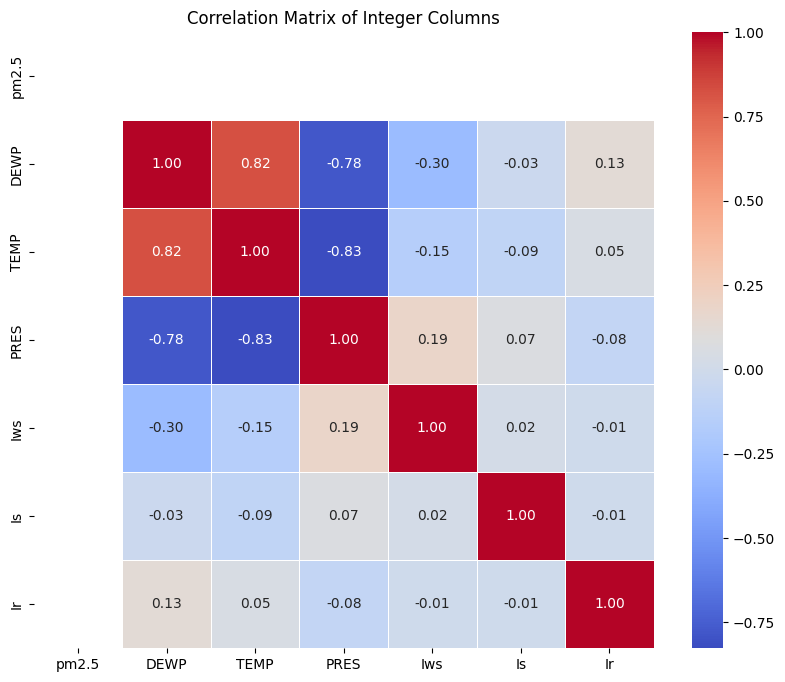

In [37]:
# Обчислення кореляційної матриці
correlation_matrix = np.corrcoef(data[:, numerical_columns].T)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            xticklabels=['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir'],
            yticklabels=['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir'])
plt.title("Correlation Matrix of Integer Columns")
plt.show()

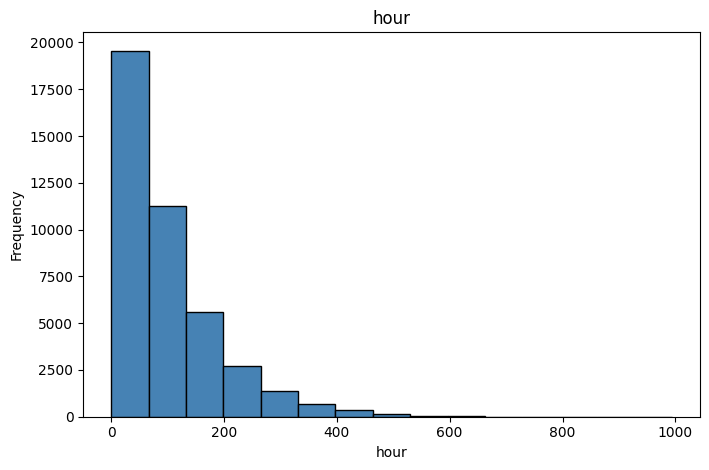

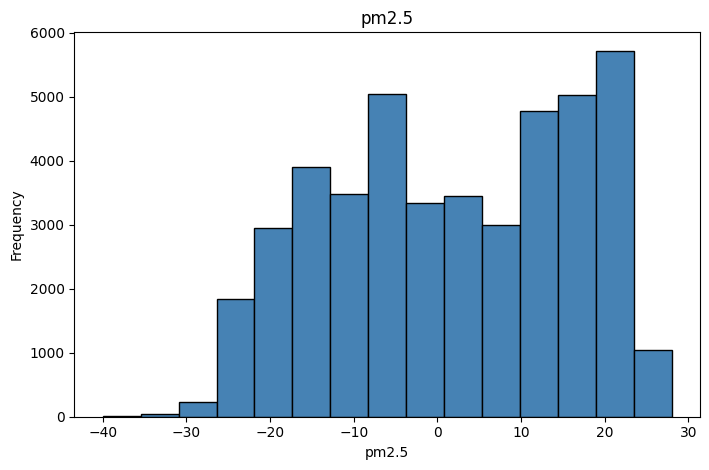

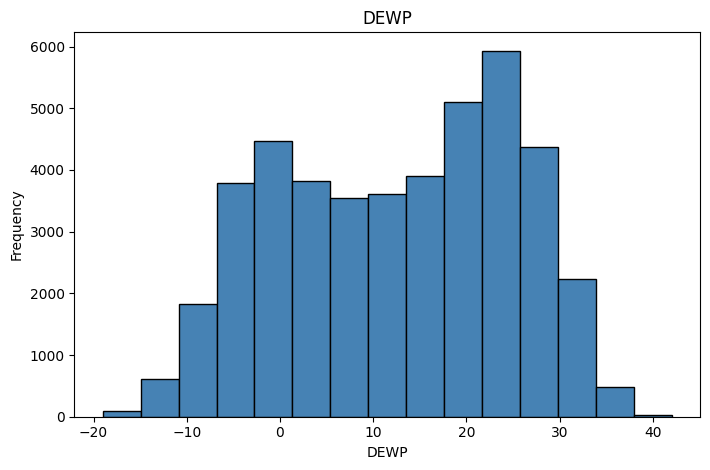

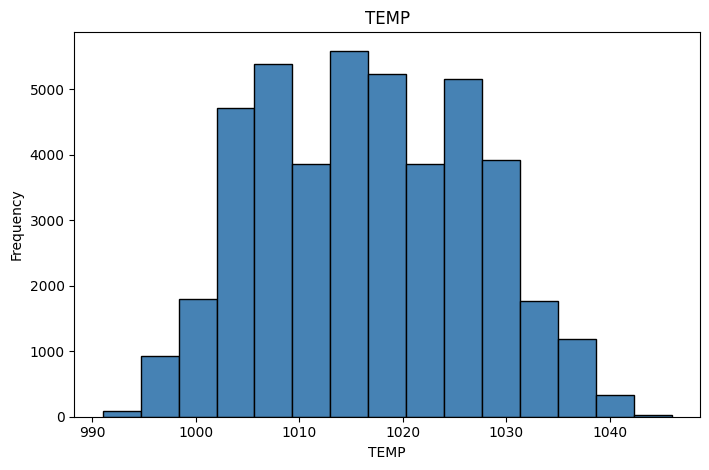

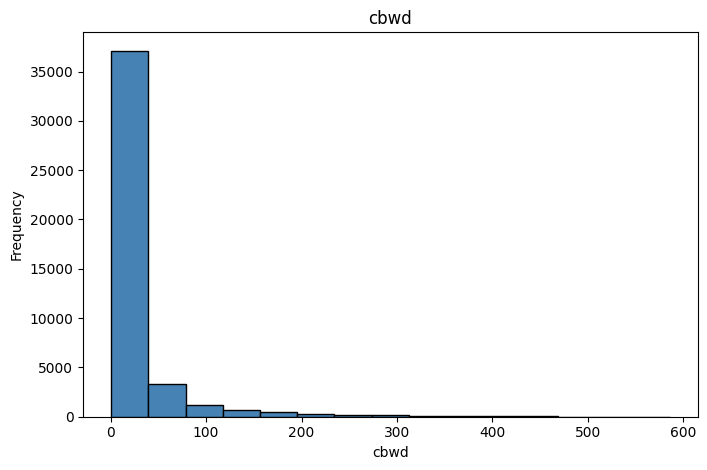

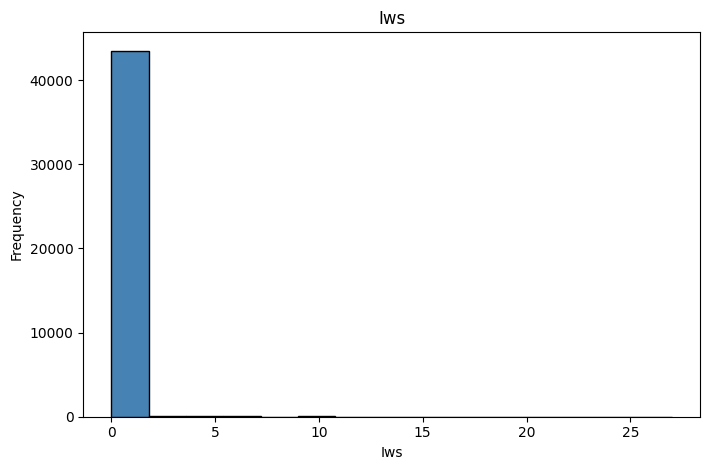

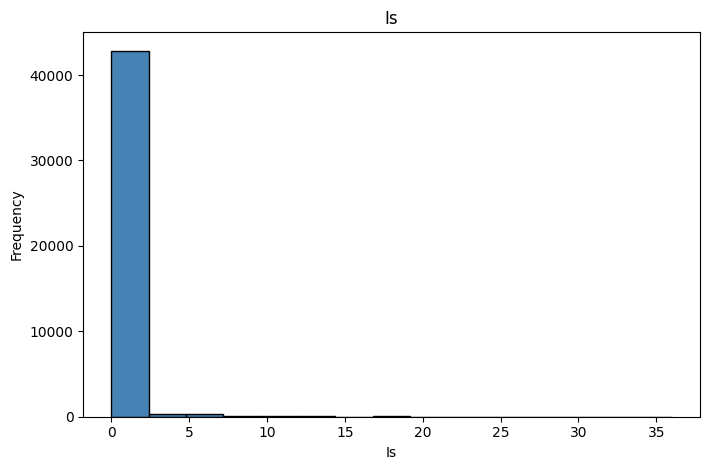

In [38]:
# Створення гістограм для кожного числового стовпця
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[:, col], bins=15, color='steelblue', edgecolor='black', linewidth=1.0)
    plt.title(column_names[col])
    plt.xlabel(column_names[col])
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.tight_layout(rect=(0, 0, 1.2, 1.2))
    plt.show()

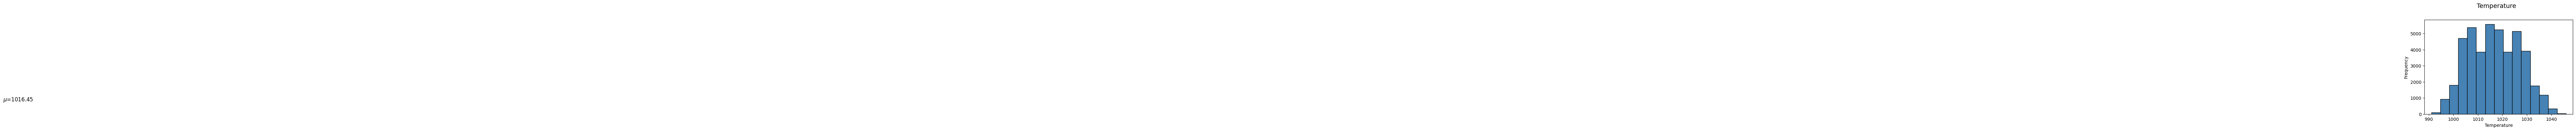

In [40]:
# Гістограма з підписами для 'TEMP'
fig = plt.figure(figsize=(6, 4))
title = fig.suptitle("Temperature", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")
ax.text(1.2, 800, r'$\mu$=' + str(round(np.nanmean(data[:, y_col_index]), 2)), fontsize=12)
freq, bins, patches = ax.hist(data[:, y_col_index], color='steelblue', bins=15, edgecolor='black', linewidth=1)

C:\Users\dasha\AppData\Local\Temp\ipykernel_8324\532627657.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[:, y_col_index], ax=ax1, shade=True, color='steelblue')


<Axes: xlabel='Temperature', ylabel='Density'>

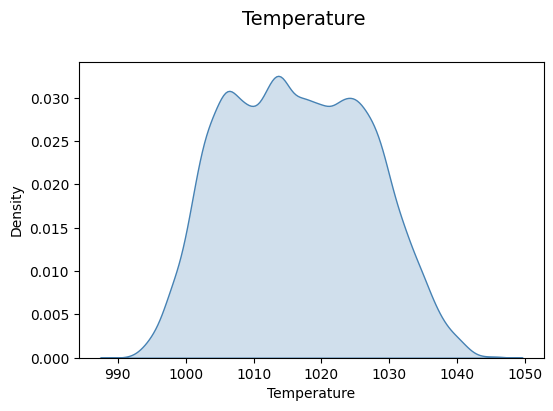

In [30]:
# Графік щільності ймовірності для 'TEMP'
fig = plt.figure(figsize=(6, 4))
title = fig.suptitle("Temperature", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Density")
sns.kdeplot(data[:, y_col_index], ax=ax1, shade=True, color='steelblue')


In [ ]:
# 3D діаграма розсіювання
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
xs = data[:, column_names.index('DEWP')]
ys = data[:, column_names.index('TEMP')]
zs = data[:, column_names.index('PRES')]
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')
ax.set_xlabel('DEWP')
ax.set_ylabel('TEMP')
ax.set_zlabel('PRES')
plt.show()

In [41]:
# Визначення атрибутів
x_attribute = 'DEWP'
y_attribute = 'TEMP'

x_col_index = column_names.index(x_attribute)
y_col_index = column_names.index(y_attribute)

# Розділення даних на тренувальну та тестову вибірки
data1, data2 = train_test_split(data_normalized, test_size=0.5, random_state=42)

X_train = data1[:, [x_col_index]]
y_train = data1[:, y_col_index]

X_test = data2[:, [x_col_index]]
y_test = data2[:, y_col_index]

In [42]:
# Ініціалізація моделей регресії
models = [LinearRegression(), Ridge(), ElasticNet()]

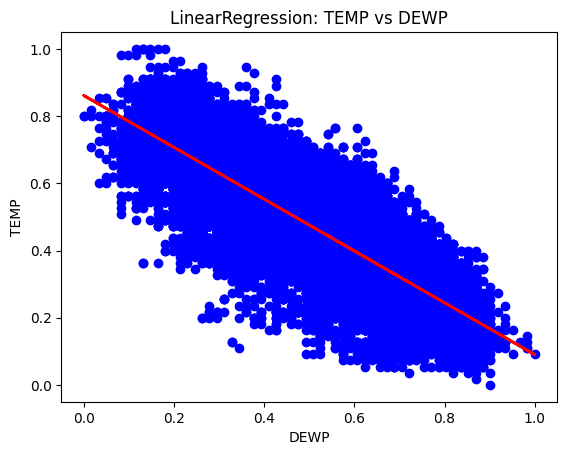

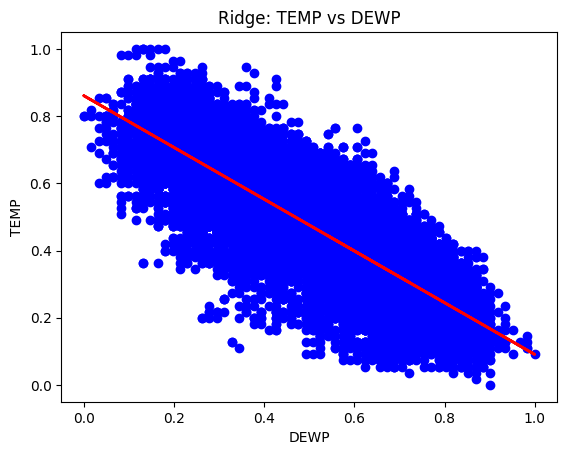

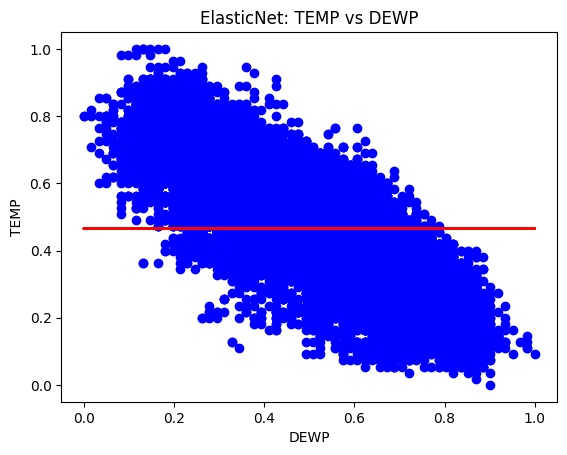

Mean Squared Error for ElasticNet: 0.034843319323272226


In [46]:
for model in models:
    # Навчання моделі
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Побудова графіку прогнозів
    plt.scatter(X_test, y_test, color='blue')
    plt.plot(X_test, y_pred, color='red', linewidth=2)
    plt.title(type(model).__name__ + ': ' + y_attribute + ' vs ' + x_attribute)
    plt.xlabel(x_attribute)
    plt.ylabel(y_attribute)
    plt.show()
# Обчислення середньоквадратичної похибки
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for {}: {}".format(type(model).__name__, mse))